## Time Series Forecasting by using ARIMA/SARIMA model


In [1]:

import pandas as pd
# import sys  
# sys.path.insert(0, '../python/')

# import file
# !ln -s ../python/plot_helper.py plot_helper.py
#from plot_helper import plotting

#!ln -s ../python/data_format.py data_format1.py
#from data_format1 import data_format

# d=data_format()
# p=plotting()
file='../Timing Analysis/ad_Aug1_advertiser_time.csv'
df=pd.read_csv(file)

df=df.drop(['Unnamed: 0','campaign_name', 'adset_name', 'ad_name','inline_link_click_ctr', 'inline_post_engagement',
       'instant_experience_clicks_to_open',
       'instant_experience_clicks_to_start',
       'instant_experience_outbound_clicks', 'interactive_component_tap_value',
       'objective', 'outbound_clicks_outbound_click',
       'outbound_clicks_ctr_outbound_click','updated_time','website_ctr_link_click'],axis=1)



In [2]:
df=df.rename(columns={'cost_per_action_type_video_view':'cpa_video_view'})
df=df.rename(columns={'cost_per_action_type_link_click':'cpa_link_click'})
df=df.rename(columns={'cost_per_action_type_onsite_conversion.post_save':'cpa_on_conv'})
df=df.rename(columns={'cost_per_action_type_omni_activate_app':'cpa_all_act_app'})
df=df.rename(columns={'cost_per_action_type_post_engagement':'cpa_post_eng'})
df=df.rename(columns={'cost_per_action_type_page_engagement':'cpa_pg_eng'})
df=df.rename(columns={'cost_per_action_type_omni_app_install':'cpa_all_app_install'})
df=df.rename(columns={'cost_per_inline_link_click':'cpinl_link_click'})
df=df.rename(columns={'cost_per_inline_post_engagement':'cpinl_post_eng'})
df=df.rename(columns={'cost_per_outbound_click_outbound_click':'cpo_click'})
df=df.rename(columns={'hourly_stats_aggregated_by_advertiser_time_zone':'time'})
#data1['conversions']=df1.unique_actions_mobile_app_install

# #data1['CR']=round((data1.conversions/data1.clicks) *100, 2)
df['CTR']=round((df.clicks / df.impressions) * 100,4)
df['CPC']= round(df.spend / df.clicks,2)
# #data1['costPerCon'] = round(data1.spend / data1.conversions, 2)
df['CPM'] = round((df.spend / df.impressions) * 1000, 2)

df.head()

,campaign_id,adset_id,ad_id,clicks,cpa_link_click,cpa_on_conv,cpa_all_act_app,cpa_post_eng,cpa_pg_eng,cpa_all_app_install,...,cpo_click,impressions,spend,date_start,date_stop,time,cpa_video_view,CTR,CPC,CPM
0,23845309179470180,23845309179490180,23845309179510180,168,0.251964,42.33,0.084155,0.246105,0.246105,0.419109,...,0.251964,4083,42.33,2020-08-01,2020-08-15,00:00:00 - 00:59:59,NaN,4.1146,0.25,10.37
1,23845314022210180,23845314039500180,23845314039460180,0,NaN,0.42,NaN,0.035000,0.035000,NaN,...,NaN,45,0.42,2020-08-01,2020-08-15,00:00:00 - 00:59:59,0.038182,0.0000,inf,9.33
2,23845314022210180,23845314039500180,23845314039480180,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6,0.03,2020-08-01,2020-08-15,00:00:00 - 00:59:59,NaN,0.0000,inf,5.00
3,23845314022210180,23845314039500180,23845314039510180,0,NaN,NaN,NaN,0.073333,0.073333,NaN,...,NaN,38,0.22,2020-08-01,2020-08-15,00:00:00 - 00:59:59,0.073333,0.0000,inf,5.79
4,23845314118080180,23845314118190180,23845314118100180,1,0.080000,NaN,NaN,0.080000,0.080000,NaN,...,0.080000,7,0.08,2020-08-01,2020-08-15,00:00:00 - 00:59:59,NaN,14.2857,0.08,11.43


In [3]:
df.time=df.time.replace('00:00:00 - 00:59:59',1)
df.time=df.time.replace('01:00:00 - 01:59:59',2)
df.time=df.time.replace('02:00:00 - 02:59:59',3)
df.time=df.time.replace('03:00:00 - 03:59:59',4)
df.time=df.time.replace('04:00:00 - 04:59:59',5)
df.time=df.time.replace('05:00:00 - 05:59:59',6)
df.time=df.time.replace('06:00:00 - 06:59:59',7)
df.time=df.time.replace('07:00:00 - 07:59:59',8)
df.time=df.time.replace('08:00:00 - 08:59:59',9)
df.time=df.time.replace('09:00:00 - 09:59:59',10)
df.time=df.time.replace('10:00:00 - 10:59:59',11)
df.time=df.time.replace('11:00:00 - 11:59:59',12)
df.time=df.time.replace('12:00:00 - 12:59:59',13)
df.time=df.time.replace('13:00:00 - 13:59:59',14)
df.time=df.time.replace('14:00:00 - 14:59:59',15)
df.time=df.time.replace('15:00:00 - 15:59:59',16)
df.time=df.time.replace('16:00:00 - 16:59:59',17)
df.time=df.time.replace('17:00:00 - 17:59:59',18)
df.time=df.time.replace('18:00:00 - 18:59:59',19)
df.time=df.time.replace('19:00:00 - 19:59:59',20)
df.time=df.time.replace('20:00:00 - 20:59:59',21)
df.time=df.time.replace('21:00:00 - 21:59:59',22)
df.time=df.time.replace('22:00:00 - 22:59:59',23)
df.time=df.time.replace('23:00:00 - 23:59:59',24)

### Visualising the time series

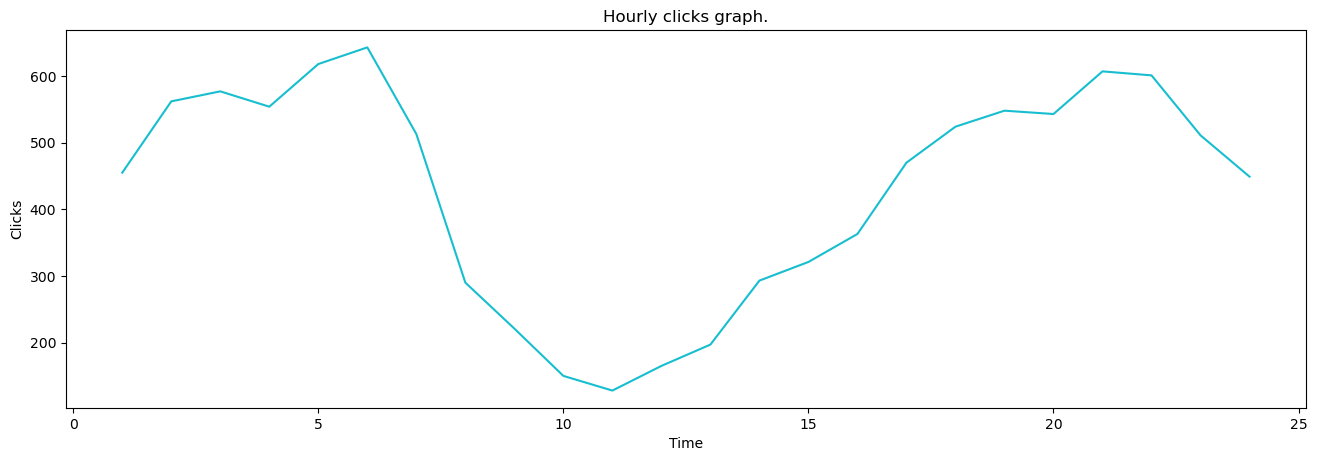

In [5]:
# Time series data source: fpp pacakge in R.
import matplotlib.pyplot as plt
grouped = pd.DataFrame(df.groupby(['time','date_start'])['clicks'].sum().reset_index())

# Draw Plot
def plot_df(df, x, y, title="", xlabel='Time', ylabel='Clicks', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:cyan')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(grouped, x=grouped.time, y=grouped.clicks, title='Hourly clicks graph.')    

In [6]:
grouped

,time,date_start,clicks
0,1.0,2020-08-01,455
1,2.0,2020-08-01,562
2,3.0,2020-08-01,577
3,4.0,2020-08-01,554
4,5.0,2020-08-01,618
5,6.0,2020-08-01,643
6,7.0,2020-08-01,513
7,8.0,2020-08-01,290
8,9.0,2020-08-01,221
9,10.0,2020-08-01,150


### Decompose a time series into its componets

In [7]:
# from statsmodels.tsa.seasonal import seasonal_decompose
# from dateutil.parser import parse

# #grouped =grouped.sort_index(inplace=True)
# # Multiplicative Decomposition 
# result_mul = seasonal_decompose(grouped['time'], model='multiplicative', extrapolate_trend=None)

# # Additive Decomposition
# result_add = seasonal_decompose(grouped['time'], model='additive', extrapolate_trend=0)

# # Plot
# plt.rcParams.update({'figure.figsize': (10,10)})
# result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
# result_add.plot().suptitle('Additive Decompose', fontsize=22)
# plt.show()

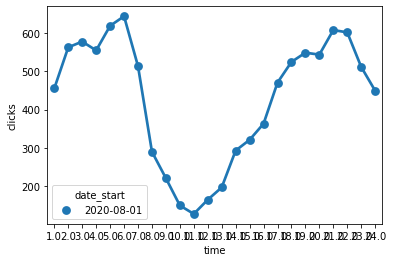

In [9]:
# the analysis should be by date not time but ok 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

grouped = pd.DataFrame(df.groupby(['time','date_start'])['clicks'].sum().reset_index())
sns.pointplot(x='time', y='clicks', hue='date_start', data=grouped)

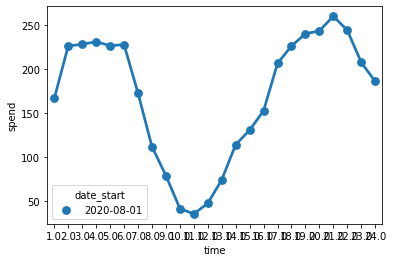

In [8]:
grouped = pd.DataFrame(df.groupby(['time','date_start'])['spend'].sum().reset_index())
sns.pointplot(x='time', y='spend', hue='date_start', data=grouped)

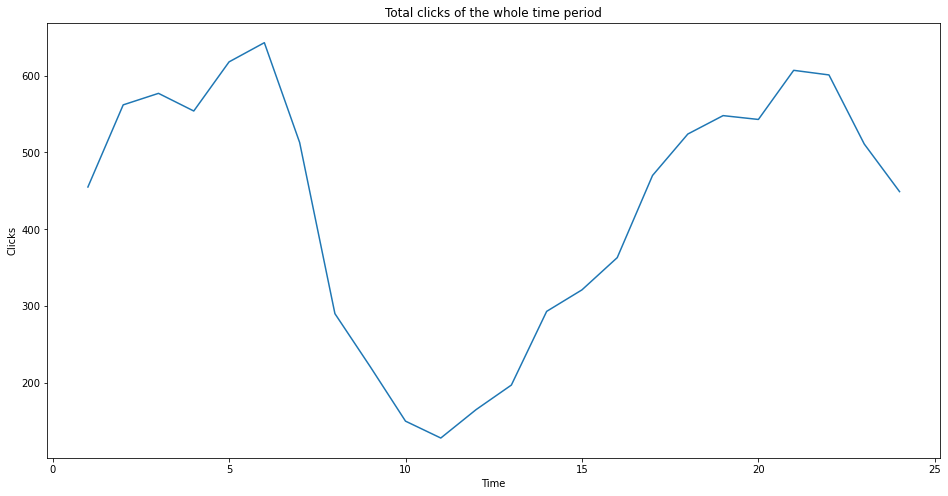

In [10]:
ts=df.groupby(["time"])["clicks"].sum()
ts.astype('float')
plt.figure(figsize=(16,8))
plt.title('Total clicks of the whole time period')
plt.xlabel('Time')
plt.ylabel('Clicks')
plt.plot(ts);

In [11]:
df1 = pd.DataFrame(df.groupby(['time'])['clicks'].sum().reset_index())

count     24.000000
mean     429.291667
std      166.783244
min      128.000000
25%      292.250000
50%      490.500000
75%      556.000000
max      643.000000
Name: clicks, dtype: float64

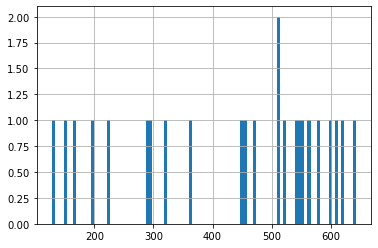

In [12]:
df1.clicks.hist(bins=100)
df1.clicks.describe()

### Check the stasionarity

In [14]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df1.clicks.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -3.470718
p-value: 0.008772


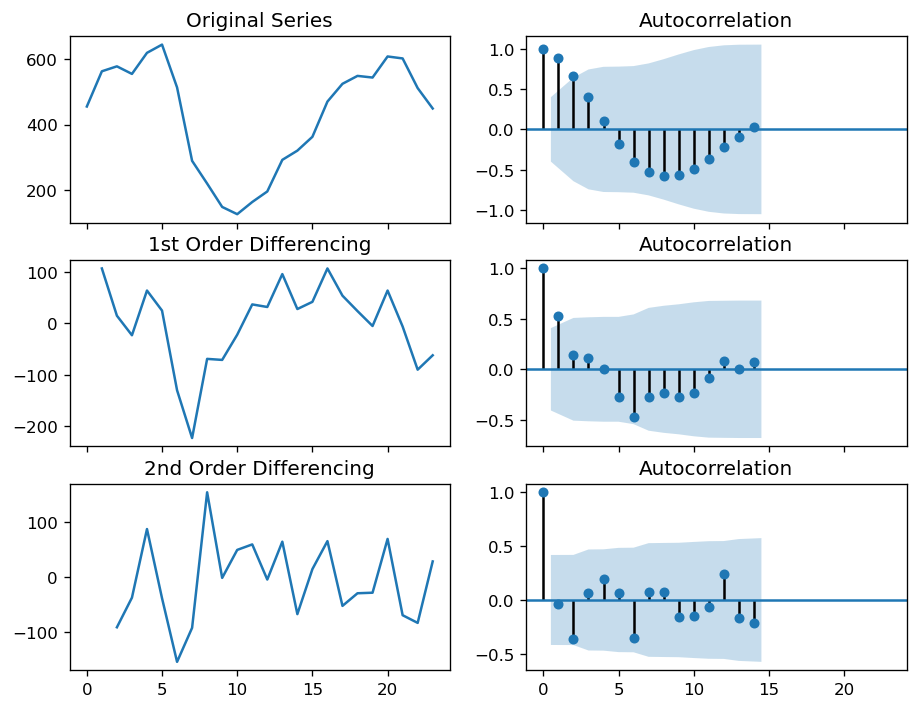

In [18]:
# Since P-value is greater than the significance level, 
#let’s difference the series and see how the autocorrelation plot looks like.

import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df1.clicks); axes[0, 0].set_title('Original Series')
plot_acf(df1.clicks, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df1.clicks.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df1.clicks.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df1.clicks.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df1.clicks.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [19]:
# For the above series, the time series reaches stationarity with two orders of differencing.
# so d=2

#testing the stationarity now with the 2nd diff
result1 = adfuller(df1.clicks.diff(2).dropna())
print('ADF Statistic: %f' % result1[0])
print('p-value: %f' % result1[1])

ADF Statistic: -1.149275
p-value: 0.695027


/opt/conda/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


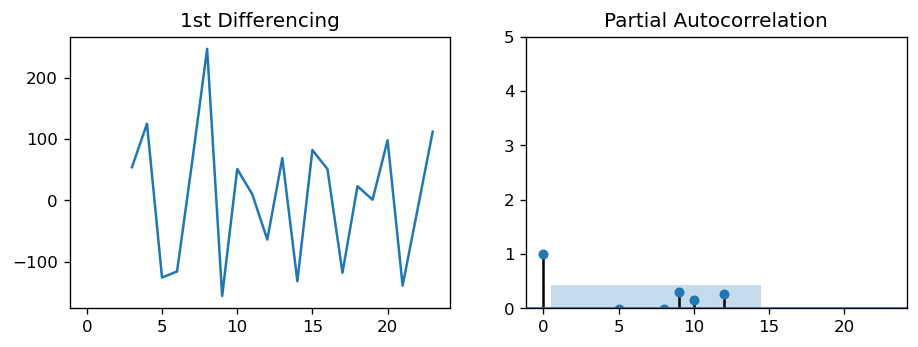

In [22]:
#Find the order of the p term
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df1.clicks.diff().diff().diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df1.clicks.diff().diff().diff().dropna(), ax=axes[1])

plt.show()

#p=2 since the value in the second plot it is inside the significance level (blue area) 

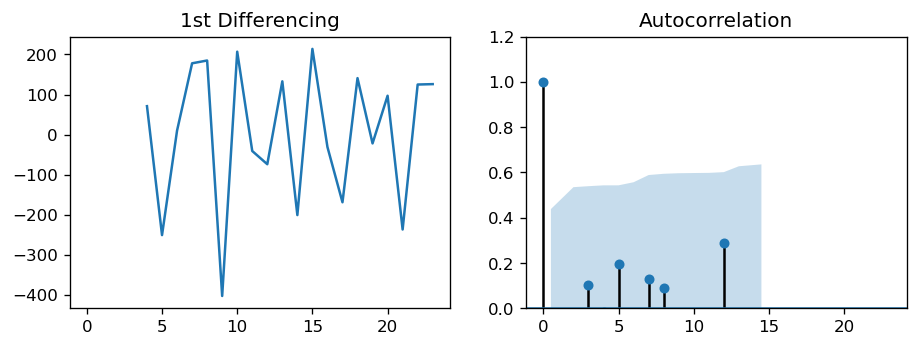

In [25]:
#How to find the q term

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df1.clicks.diff().diff().diff().diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df1.clicks.diff().diff().diff().diff().dropna(), ax=axes[1])

plt.show()
#so q=2

In [43]:
from statsmodels.tsa.arima_model import ARIMA


# 1,1,2 ARIMA Model
model = ARIMA(df1.clicks, order=(3,2,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

ModuleNotFoundError: No module named 'statsmodels.tsa.SARIMAX'

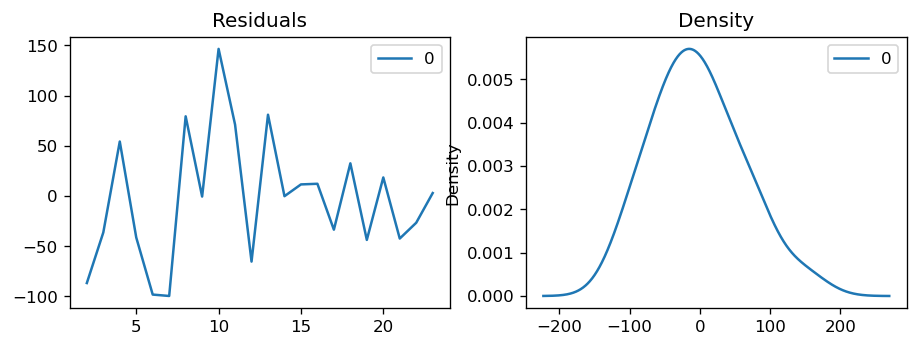

In [35]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

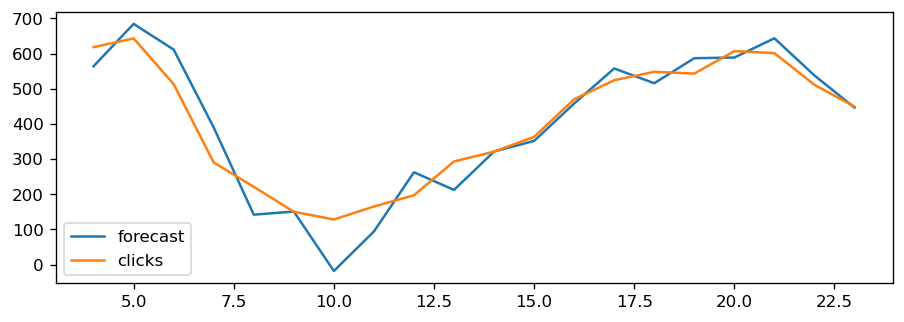

In [36]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

## Out of time cross validation 

In [56]:
from statsmodels.tsa.stattools import acf
#We need to split the data in train and test samples where we use the test sample to check the forecasting
# Create Training and Test
train = df1.clicks[:22]
test = df1.clicks[22:]



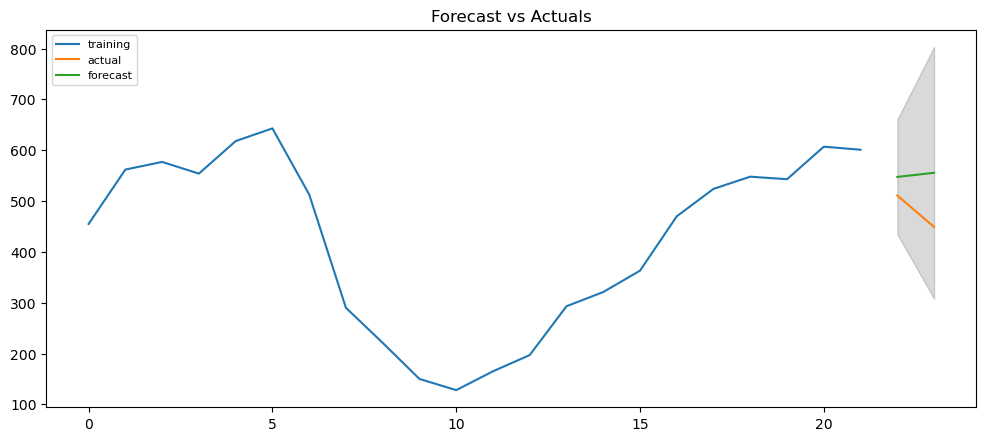

In [64]:
# Build Model
model = ARIMA(train, order=(3, 2, 2)) 

fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(2, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

### Hyperparameters Tuning

In [46]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
p_values=range(0,8)
d_values=range(0,3)
q_values=range(0,5)

In [80]:
decision=pd.DataFrame()
#decision.column=['error','order']
er=[]
orders=[]
for p in p_values:
    for d in d_values:
        for q in q_values:
            order=(p,d,q)
            train,test = df1.clicks[:23],df1.clicks[23:]
            predictions=list()
            for i in range(len(test)):
                try:
                    model=ARIMA(train,order)
                    model_fit=model.fit(disp=0)
                    pred_y=model_fit.forecast()[0]
                    predictions.append(pred_y)
                    error=mean_squared_error(test,predictions)
                    er.append(error)
                    orders.append(order)
                    print('ARIMA%s, MSE= %.2f'% (order,error))
                except:
                    continue
#print(sorted(er)) 
decision['error']=er
decision['order']=orders

ARIMA(0, 0, 1), MSE= 528.08
ARIMA(0, 1, 1), MSE= 4078.56
ARIMA(0, 1, 2), MSE= 4346.79
ARIMA(0, 2, 1), MSE= 1011.13
ARIMA(0, 2, 2), MSE= 1754.89
ARIMA(0, 2, 3), MSE= 159.65
ARIMA(0, 2, 4), MSE= 1370.28
ARIMA(1, 0, 0), MSE= 2882.90
ARIMA(1, 0, 1), MSE= 3576.27
ARIMA(1, 0, 2), MSE= 3619.00
ARIMA(1, 1, 0), MSE= 184.36
ARIMA(1, 1, 1), MSE= 1104.15
ARIMA(1, 1, 2), MSE= 723.78
ARIMA(1, 2, 0), MSE= 1294.20
ARIMA(2, 0, 1), MSE= 645.10
ARIMA(2, 0, 2), MSE= 1165.13
ARIMA(2, 1, 0), MSE= 10.29
ARIMA(2, 1, 1), MSE= 1043.88
ARIMA(2, 1, 2), MSE= 3.59
ARIMA(2, 2, 0), MSE= 28.43
ARIMA(2, 2, 1), MSE= 21.35
ARIMA(3, 1, 0), MSE= 197.06
ARIMA(3, 1, 1), MSE= 1724.10
ARIMA(3, 2, 0), MSE= 18.08
ARIMA(3, 2, 1), MSE= 19.12
ARIMA(3, 2, 2), MSE= 87.47
ARIMA(4, 0, 1), MSE= 2216.51
ARIMA(4, 0, 2), MSE= 98.70
ARIMA(4, 0, 4), MSE= 2323.58
ARIMA(4, 1, 0), MSE= 516.63
ARIMA(4, 1, 1), MSE= 9.72
ARIMA(4, 2, 0), MSE= 119.85
ARIMA(4, 2, 1), MSE= 113.70
ARIMA(5, 0, 1), MSE= 3178.71
ARIMA(5, 1, 0), MSE= 63.51
ARIMA(5, 1, 1), 

In [82]:
decision.sort_values(by='error', ascending=True)

,error,order
50,0.761496,"(7, 1, 2)"
18,3.588498,"(2, 1, 2)"
30,9.723072,"(4, 1, 1)"
16,10.288696,"(2, 1, 0)"
41,14.422074,"(6, 1, 0)"
36,14.798417,"(5, 1, 2)"
23,18.081020,"(3, 2, 0)"
24,19.117788,"(3, 2, 1)"
20,21.349470,"(2, 2, 1)"
19,28.431747,"(2, 2, 0)"
